In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [4]:
reddit = pd.read_csv('Data/reddit_data.csv', index_col=0)
biden = pd.read_csv('Data/approval_topline.csv', index_col=0)

In [14]:
politics = reddit.loc[reddit['subreddit'] == 'politics']
news = reddit.loc[reddit['subreddit'] == 'news']
liberal = reddit.loc[reddit['subreddit'] == 'Liberal']
democrats = reddit.loc[reddit['subreddit'] == 'democrats']
conservative = reddit.loc[reddit['subreddit'] == 'Conservative']
libertarian = reddit.loc[reddit['subreddit'] == 'Libertarian']

In [5]:
reddit.head()

,author,body,created_utc,permalink,score,subreddit,total_awards_received,Polarity,Subjectivity,Sentiment,date,target
0,Flip2428,Growing up there I was always dumbfounded on h...,2021-04-01 17:17:58,/r/politics/comments/mhy1zm/new_mexico_is_set_...,1,politics,0,-0.051389,0.368056,Negative,4/1/2021,53.43079
1,boatpile,"Gaetz didn't even say ""no age you can't be sex...",2021-04-01 17:17:58,/r/politics/comments/mhuv7u/theres_no_age_that...,1,politics,0,0.412500,0.820833,Positive,4/1/2021,53.43079
2,theombudsmen,"I'm sure everyone knows this, but to clarify t...",2021-04-01 17:17:56,/r/politics/comments/mhzm4r/the_gop_rightly_fe...,1,politics,0,0.100000,0.853472,Positive,4/1/2021,53.43079
3,Tony_Chu,Hang up decorations with zip ties and cheer th...,2021-04-01 17:17:54,/r/politics/comments/mhulza/biden_must_clean_u...,1,politics,0,0.000000,0.000000,Neutral,4/1/2021,53.43079
4,Fellums2,"Aside from the fact that he is just awful, he ...",2021-04-01 17:17:53,/r/politics/comments/mhmik7/ap_poll_finds_bide...,1,politics,0,-0.284821,0.735714,Negative,4/1/2021,53.43079


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

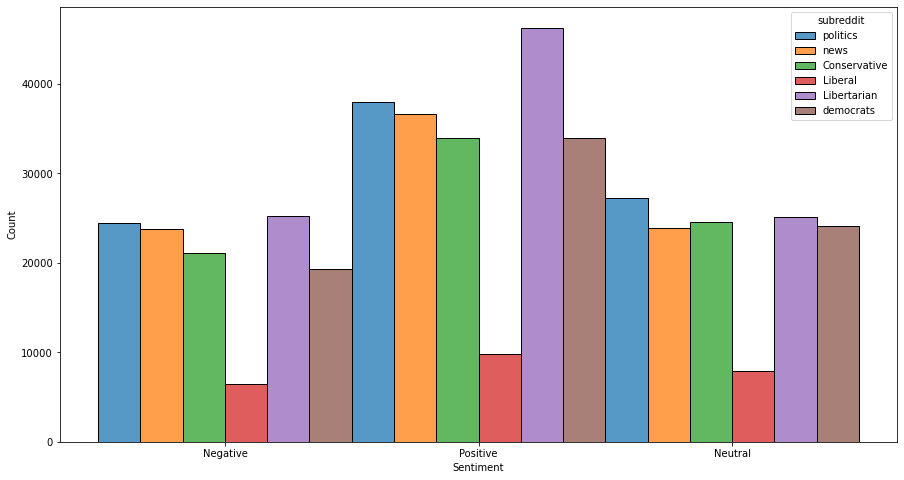

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=reddit, x='Sentiment', hue='subreddit', multiple='dodge')

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

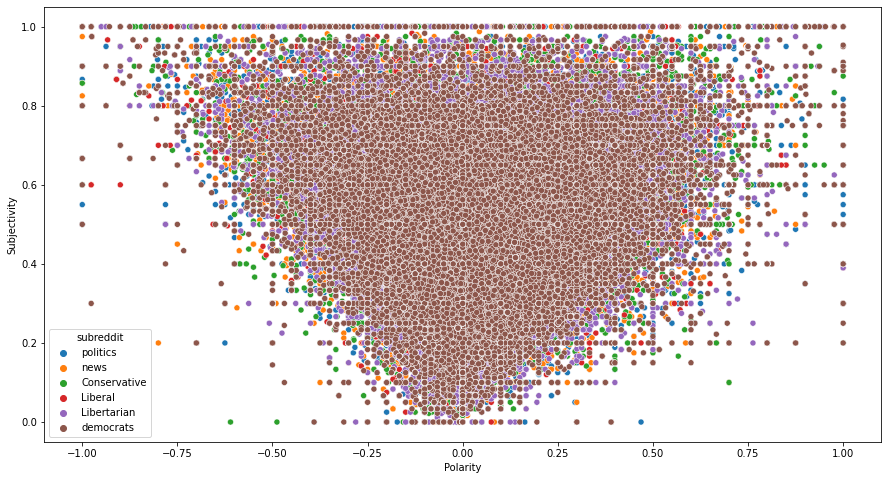

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=reddit, x='Polarity', y='Subjectivity', hue='subreddit')

In [21]:
politics_text = " ".join(comment for comment in politics['body'])
news_text = " ".join(comment for comment in news['body'])
liberal_text = " ".join(comment for comment in liberal['body'])
democrats_text = " ".join(comment for comment in democrats['body'])
conservative_text = " ".join(comment for comment in conservative['body'])
libertarian_text = " ".join(comment for comment in libertarian['body'])

In [77]:
stopwords = set(STOPWORDS)
stopwords.update(['people', 'one', 'think', 'gt', 'reddit', 'https', 'know', 'will', 'make', 'even'])

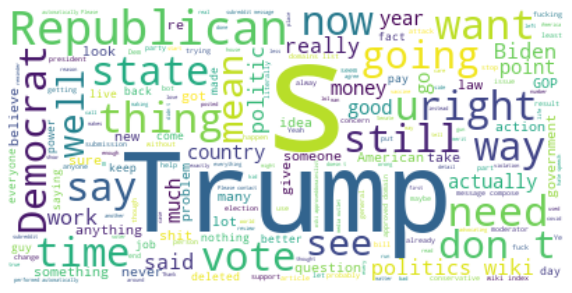

In [78]:
politics_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(politics_text)
plt.figure(figsize=(10,10))
plt.imshow(politics_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

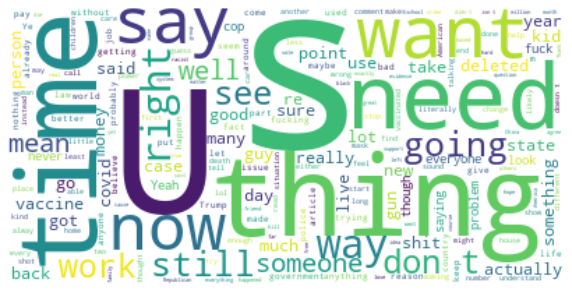

In [79]:
news_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(news_text)
plt.figure(figsize=(10,10))
plt.imshow(news_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

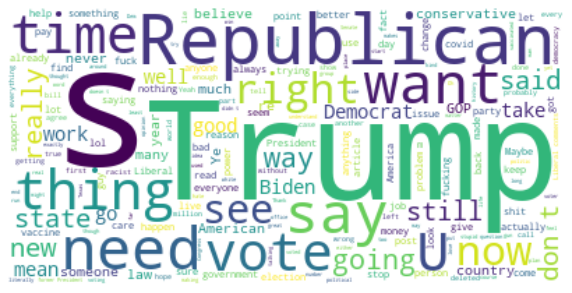

In [80]:
liberal_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(liberal_text)
plt.figure(figsize=(10,10))
plt.imshow(liberal_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

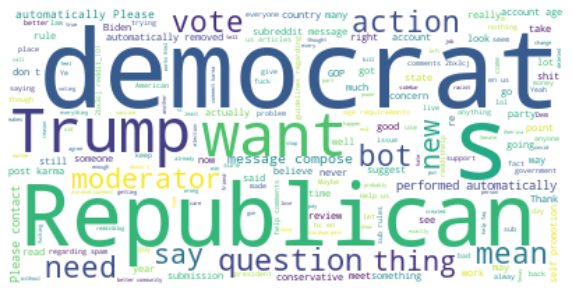

In [81]:
democrats_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(democrats_text)
plt.figure(figsize=(10,10))
plt.imshow(democrats_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

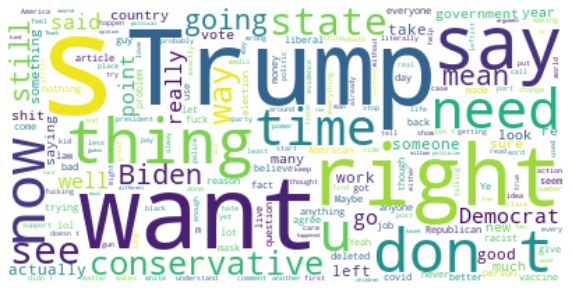

In [82]:
conservative_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(conservative_text)
plt.figure(figsize=(10,10))
plt.imshow(conservative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

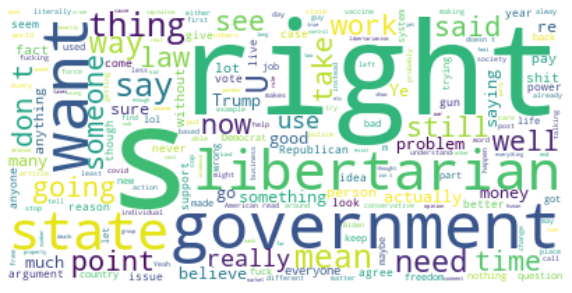

In [84]:
libertarian_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(libertarian_text)
plt.figure(figsize=(10,10))
plt.imshow(libertarian_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()